In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données

In [2]:
customers = pd.read_csv("data/customers_dataset.csv/olist_customers_dataset.csv")
products = pd.read_csv("data/products_dataset.csv/olist_products_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv/olist_orders_dataset.csv")
order_reviews = pd.read_csv("data/order_reviews_dataset.csv/olist_order_reviews_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv/olist_order_payments_dataset.csv")
order_items = pd.read_csv("data/order_items_dataset.csv/olist_order_items_dataset.csv")
geolocation = pd.read_csv("data/geolocation_dataset.csv/olist_geolocation_dataset.csv")
sellers = pd.read_csv("data/olist_sellers_dataset.csv")
translation = pd.read_csv("data/product_category_name_translation.csv")

In [3]:
dfs = {"customers": customers,
            "products" : products,
            "orders" : orders,
            "order_reviews" : order_reviews,
            "order_payments" : order_payments,
            "order_items" : order_items,
            "geolocation" : geolocation,
            "sellers" : sellers,
            "translation" : translation}

# Observations des jeux de données

In [4]:
for name, df in dfs.items():
    display(name, df.head(3))

'customers'

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


'products'

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


'orders'

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


'order_reviews'

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


'order_payments'

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


'order_items'

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


'geolocation'

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


'sellers'

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


'translation'

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


# Taille des jeux de données

In [5]:
for name, df in dfs.items():
    print("{} : {}".format(name, df.shape))

customers : (99441, 5)
products : (32951, 9)
orders : (99441, 8)
order_reviews : (100000, 7)
order_payments : (103886, 5)
order_items : (112650, 7)
geolocation : (1000163, 5)
sellers : (3095, 4)
translation : (71, 2)


In [6]:
for name, df in dfs.items():
    print(name, df.isna().sum().sum())

customers 0
products 2448
orders 4908
order_reviews 146532
order_payments 0
order_items 0
geolocation 0
sellers 0
translation 0


##### IL manque des valeurs seulement dans 'products', 'orders' et 'order_reviews'

### Visualisation des valeurs manquantes dans les datasets 'products', 'orders' et 'order_reviews'

In [7]:
products.isna().sum(axis=0)

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Les données manquantes correspondent à la catégorie de produits, de description, de nom et des photos.
La catégorie de produits est une information importante, on pourra éventuellement leur donner des attributs correspondant à leur caractère inconnu.

In [8]:
orders.isna().sum(axis=0)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Les données manquantes correspondent aux commandes qui posent problème.

In [9]:
order_reviews.isna().sum(axis=0)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Les données manquantes correspondent à des commentaires vides.

# Doublons

In [10]:
for name, df in dfs.items():
    print(name, ':', df.duplicated().sum())

customers : 0
products : 0
orders : 0
order_reviews : 0
order_payments : 0
order_items : 0
geolocation : 261831
sellers : 0
translation : 0


# Types de données

In [11]:
liste_df = [customers, 
            products,
            orders,
            order_reviews,
            order_payments,
            order_items,
            geolocation,
            sellers,
            translation]

In [12]:
noms_df = ['customers', 
            'products',
            'orders',
            'order_reviews',
            'order_payments',
            'order_items',
            'geolocation',
            'sellers',
            'translation']

In [13]:
customers['customer_unique_id'].nunique()

96096

In [14]:
i=0
liste_indices = []
liste_colonnes = []
liste_types = []
liste_uniques = []
liste_nulles = []

for df in liste_df:

    for column in df.columns:
        liste_indices.append(noms_df[i])
        liste_colonnes.append(column)
        liste_types.append(df[column].dtype)
        liste_uniques.append(df[column].nunique())
        liste_nulles.append(df[column].isna().sum(axis=0))
    i+=1
resume_data = pd.DataFrame([liste_indices, 
                            liste_colonnes, 
                            liste_types, 
                            liste_uniques,
                            liste_nulles]
                          ).T
resume_data.columns=['Donnees', 'Nom colonne', 'Type', 'valeurs uniques', 'valeurs nulles']
resume_data

,Donnees,Nom colonne,Type,valeurs uniques,valeurs nulles
0,customers,customer_id,object,99441,0
1,customers,customer_unique_id,object,96096,0
2,customers,customer_zip_code_prefix,int64,14994,0
3,customers,customer_city,object,4119,0
4,customers,customer_state,object,27,0
5,products,product_id,object,32951,0
6,products,product_category_name,object,73,610
7,products,product_name_lenght,float64,66,610
8,products,product_description_lenght,float64,2960,610
9,products,product_photos_qty,float64,19,610


# Observation :

#### - Customers : Ensemble de données client

Cet ensemble de données contient des informations sur le client et son emplacement. Utilisez-le pour identifier les clients uniques dans l'ensemble de données des commandes et pour trouver le lieu de livraison des commandes.

Dans notre système, chaque commande est attribuée à un identifiant client unique. Cela signifie que le même client obtiendra des identifiants différents pour différentes commandes. Le but d'avoir un client unique_id sur l'ensemble de données est de vous permettre d'identifier les clients qui ont effectué des rachats en magasin. Sinon, vous constaterez que chaque commande est associée à un client différent.

- Observation :

- il y a plus de customer_unique_id que de customer_id
- customer_state pourrait être catégorisé

#### - Products :

Cet ensemble de données comprend des données sur les produits vendus par Olist.

- Observation :
- Il y a 74 catégories différentes.

#### - Orders :

Il s'agit du jeu de données principal. De chaque commande, vous pouvez trouver toutes les autres informations.

- Observation :
- order_purchase_timestamp : à mettre en format date
- order_approved_at : à mettre en format date
- order_delivered_carrier_date : à mettre en format date
- order_delivered_customer_date : à mettre en format date
- order_estimated_delivery_date : à mettre en format date

#### - Order_reviews :

Cet ensemble de données comprend des données sur les avis effectués par les clients.

Une fois qu'un client achète le produit sur Olist Store, un vendeur est averti de traiter cette commande. Une fois que le client reçoit le produit ou que la date de livraison estimée est due, le client reçoit une enquête de satisfaction par e-mail dans laquelle il peut donner une note pour l'expérience d'achat et écrire quelques commentaires.

- Observation :
- review_creation_date : à mettre en format date
- review_answer_timestamp : à mettre en format date

#### - Order_payments :

Cet ensemble de données comprend des données sur les options de paiement des commandes.

- Observation :
- order_id contient autant de valeurs que dans order
- payment_sequential et payment_type pourraient être catégorisés

#### - Order_items :

Cet ensemble de données comprend des données sur les articles achetés dans chaque commande.

- Observation :
- order_item_id contient 21 types différents
- shipping_limit_date : à mettre en format date

#### - Geolocation :

Cet ensemble de données contient des informations sur les codes postaux brésiliens et ses coordonnées lat / lng. Utilisez-le pour tracer des cartes et trouver les distances entre les vendeurs et les clients.

- Observation :
- geolocation_state pourrait être catégorisé

#### - Sellers :

Cet ensemble de données comprend des données sur les vendeurs qui ont exécuté les commandes passées chez Olist. Utilisez-le pour trouver l'emplacement du vendeur et pour identifier le vendeur qui a livré chaque produit.

- Observation :


#### - Translation :

Cet ensemble de données contient les traductions des catégories de produit.

- Observation :
- 3 catégories non traduites : la_cuisine, cds_dvs_musicals, dvds_blu_ray

In [15]:
translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


# Outlier

In [16]:
from sklearn.neighbors import LocalOutlierFactor

def delete_univariate_outliers(dataframe):
    '''Suppression des valeurs extrêmes du dataset - on exclut le centile le plus extreme
    Entree: objet dataframe
    Traitement : Supression Nan univariés
    Sortie : objet dataframe
    '''
    #valeurs extremes
    index_nan = []
    index_nan_flat = []
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :

        
        index_nan.append(dataframe.loc[dataframe[column] > dataframe[
            column].quantile(0.99)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < dataframe[
            column].quantile(0.01)].index.tolist())

    for sublist in index_nan:
        for item in sublist:
            index_nan_flat.append(item)
                
    #suppression des doublons
    index_nan_flat = list(dict.fromkeys(index_nan_flat))
    dataframe[column].loc[index_nan_flat] = np.nan

    return dataframe.dropna(axis=0)

def delete_multivariate_outliers(dataframe):
    '''Suppression des outliers multivariés 
    (1% le plus éloigné par le calcul de la distance aux 5 plus proches voisins)
    Entree : objet dataframe
    Sortie : objet dataframe
    '''
    
    lof = LocalOutlierFactor(n_neighbors = 5, n_jobs=-1)
    lof.fit_predict(dataframe.select_dtypes(['float64','int32']).dropna())
    indices = dataframe.select_dtypes(['float64','int32']).dropna().index
    df_lof = pd.DataFrame(index = indices,
                           data = lof.negative_outlier_factor_, columns=['lof'])
    index_to_drop = df_lof[df_lof['lof']< np.quantile(
        lof.negative_outlier_factor_, 0.01)].index
    return dataframe.drop(index_to_drop, axis=0)

def clean_outliers(dataframe):
    dataframe = delete_univariate_outliers(dataframe)

    dataframe = delete_multivariate_outliers(dataframe)
    return dataframe


# Nettoyage

#### Traitement des valeurs manquantes 

In [17]:
geolocation.drop_duplicates(inplace=True)
# Remplacer par des valeurs vides
order_reviews['review_comment_title'].fillna(' ',inplace=True)
order_reviews['review_comment_message'].fillna(' ',inplace=True)
    
# Remplacer par des 0
orders['order_approved_at'].fillna(-1, inplace=True)
orders['order_delivered_carrier_date'].fillna(0, inplace=True)
orders['order_delivered_customer_date'].fillna(0, inplace=True)

products['product_category_name'].fillna('Unkwown',inplace=True)
products['product_name_lenght'].fillna(0, inplace=True)
products['product_description_lenght'].fillna(0, inplace=True)
products['product_photos_qty'].fillna(0, inplace=True)
products['product_weight_g'].fillna(0, inplace=True)
products['product_length_cm'].fillna(0, inplace=True)
products['product_height_cm'].fillna(0, inplace=True)
products['product_width_cm'].fillna(0, inplace=True)
    

In [18]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


## Categorie

In [19]:
dict_categories = {
#home (maison)
'furniture_living_room' : 'home',
'furniture_mattress_and_upholstery' : 'home',
'furniture_bedroom' : 'home',
'furniture_decor' : 'home',
'bed_bath_table' : 'home',
'kitchen_dining_laundry_garden_furniture' : 'home',
'la_cuisine' : 'home',
'home_confort' : 'home',
'home_comfort_2' : 'home',
'christmas_supplies' : 'home',
    
#appliances(appareils électroménagers)
'small_appliances' : 'appliances',
'small_appliances_home_oven_and_coffee' : 'appliances',
'home_appliances_2' : 'appliances',
'home_appliances' : 'appliances',
'housewares' : 'appliances',
    
#construction
'construction_tools_construction': 'construction',
'costruction_tools_garden': 'construction',
'costruction_tools_tools': 'construction',
'construction_tools_safety': 'construction',
'construction_tools_lights': 'construction',
'home_construction': 'construction',
'air_conditioning': 'construction',
#furnitures
    
#office(bureau)
'office_furniture' : 'office',
'industry_commerce_and_business' : 'office',
'stationery' : 'office',
'agro_industry_and_commerce' : 'office',
'signaling_and_security' : 'office',
'furnitures' : 'office',
'security_and_services' : 'office',
#electronics
'telephony' : 'electronics',
'electronics': 'electronics',
'computers_accessories': 'electronics',
'consoles_games': 'electronics',
'fixed_telephony': 'electronics',
'audio': 'electronics',
'computers': 'electronics',
'tablets_printing_image': 'electronics',
#sports_leisure(sport de loisir)
'sports_leisure' : 'sports_leisure',
'musical_instruments': 'sports_leisure',
'party_supplies': 'sports_leisure',
'luggage_accessories': 'sports_leisure',
#arts
'books' : 'arts',
'books_imported': 'arts',
'books_general_interest': 'arts',
'books_technical': 'arts',
'art': 'arts',
'toys': 'arts',
'cine_photo': 'arts',
'cds_dvds_musicals': 'arts',
'music': 'arts',
'dvds_blu_ray': 'arts',
'arts_and_craftmanship': 'arts',
#fashion
'watches_gifts' : 'fashion',
'fashion_bags_accessories' : 'fashion',
'fashion_underwear_beach' : 'fashion',
'fashion_shoes' : 'fashion', 
'fashion_male_clothing' : 'fashion',
'fashio_female_clothing' : 'fashion',
'fashion_sport' : 'fashion',
'fashion_childrens_clothes' : 'fashion',
#health_beauty (Santé & Beauté)
'health_beauty' : 'health_beauty', 
'baby': 'health_beauty',
'diapers_and_hygiene' : 'health_beauty',
'perfumery' : 'health_beauty',
#garden and pets (animaux domestiques)
'flowers' : 'garden_pets',
'pet_shop' : 'garden_pets',
'garden_tools' : 'garden_pets',
#auto
'auto' : 'auto',
#food_drinks (boissons alimentaires)
'food_drink' : 'food_drinks',
'food' : 'food_drinks',
'drinks' : 'food_drinks',
#other
'Unknown' : 'other',
'market_place' : 'other', 
'cool_stuff' : 'other'}

# Analyse exploratoire achat

###  Traduction des categories de produits

In [20]:
products_translation = pd.merge(translation, products,
                               how='right', 
                               left_on='product_category_name', 
                               right_on='product_category_name'
                              ).groupby(
        'product_id').max()[['product_category_name_english']]

#products_translation.columns = ['product_id', 'product_category_name_translation']
#products_translation.set_index('product_id', inplace=True)

In [21]:
products_translation

,product_category_name_english
product_id,
00066f42aeeb9f3007548bb9d3f33c38,perfumery
00088930e925c41fd95ebfe695fd2655,auto
0009406fd7479715e4bef61dd91f2462,bed_bath_table
000b8f95fcb9e0096488278317764d19,housewares
000d9be29b5207b54e86aa1b1ac54872,watches_gifts
...,...
fff6177642830a9a94a0f2cba5e476d1,cool_stuff
fff81cc3158d2725c0655ab9ba0f712c,health_beauty
fff9553ac224cec9d15d49f5a263411f,fashion_bags_accessories


### Nombre d'achats total par client

In [22]:
#Nombre d'achats total par client
produits_par_client = pd.merge(customers, 
                               pd.merge(order_items, 
                                        orders))
    
nb_produits_total = produits_par_client.groupby('customer_id')['product_id'].count()
nb_produits_total.rename('Nb_pdts', inplace=True)

customer_id
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
                                   ..
fffcb937e9dd47a13f05ecb8290f4d3e    1
fffecc9f79fd8c764f843e9951b11341    1
fffeda5b6d849fbd39689bb92087f431    1
ffff42319e9b2d713724ae527742af25    1
ffffa3172527f765de70084a7e53aae8    2
Name: Nb_pdts, Length: 98666, dtype: int64

###  Les catégories les plus achetées

Text(0, 0.5, 'Categorie de produits')

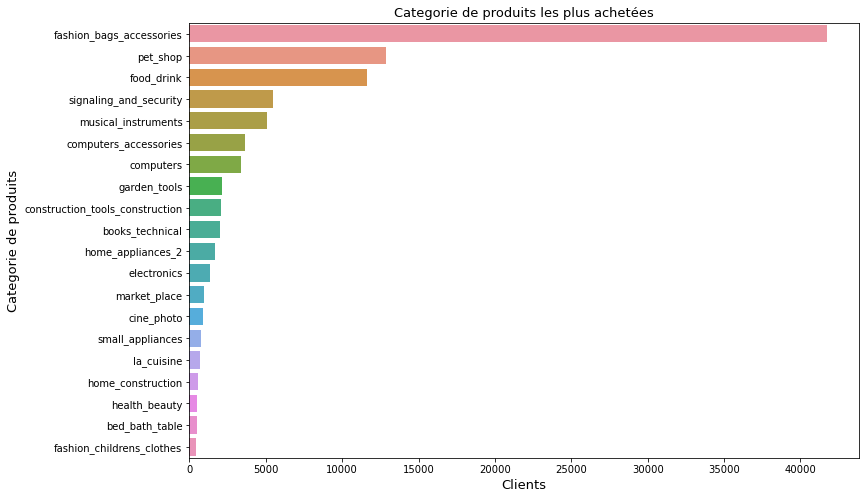

In [23]:
plt.figure(figsize=[12, 8])
sns.barplot(y=translation['product_category_name_english'].value_counts().head(20).index,
            x=customers['customer_state'].value_counts().head(20).values)
plt.title('Categorie de produits les plus achetées', fontsize=13)
plt.xlabel('Clients', fontsize=13)
plt.ylabel('Categorie de produits', fontsize=13)

In [24]:
products_translation = pd.merge(products, translation).drop(
        ['product_category_name'], axis=1)

In [25]:
products_translation

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


In [26]:
#Catégorie la plus achetée
cat = pd.merge(produits_par_client, products_translation).sort_values(
        ['customer_id','product_category_name_english'], ascending=False).groupby(
        ['customer_id','product_category_name_english']).head(1)[[
        'customer_unique_id', 'product_category_name_english']]
cat.columns = ['customer_unique_id', 'categorie_la_plus_achetee']
cat['categorie_la_plus_achetee'] = cat['categorie_la_plus_achetee'].map(dict_categories) 

cat.set_index('customer_unique_id', inplace=True)

In [27]:
cat

,categorie_la_plus_achetee
customer_unique_id,
48fd7dec70f2b104a1d5e8c5c639102b,home
680213db6ebd9e4f24d03280cbe10346,home
afbb5a642107cf6bb1ca68e863175f03,electronics
e5794df8573fa179a90a7b797fc4b71f,home
bb438f958261edabbe96fc22622499c4,arts
...,...
0b83f73b19c2019e182fd552c048a22c,home
4893ad4ea28b2c5b3ddf4e82e79db9e6,other
94b11d37cd61cb2994a194d11f89682b,health_beauty


### Montant moyen des achats

In [28]:
achats_moy = pd.merge(order_items, orders).groupby(['customer_id', 'order_id'])['price'].sum().groupby(['customer_id']).mean()
achats_moy.rename('Total_moyen_achats', inplace=True)

customer_id
00012a2ce6f8dcda20d059ce98491703     89.80
000161a058600d5901f007fab4c27140     54.90
0001fd6190edaaf884bcaf3d49edf079    179.99
0002414f95344307404f0ace7a26f1d5    149.90
000379cdec625522490c315e70c7a9fb     93.00
                                     ...  
fffcb937e9dd47a13f05ecb8290f4d3e     78.00
fffecc9f79fd8c764f843e9951b11341     54.90
fffeda5b6d849fbd39689bb92087f431     47.90
ffff42319e9b2d713724ae527742af25    199.90
ffffa3172527f765de70084a7e53aae8     21.80
Name: Total_moyen_achats, Length: 98666, dtype: float64

Text(0.5, 1.0, 'Montant moyen des achats(pourcentage)')

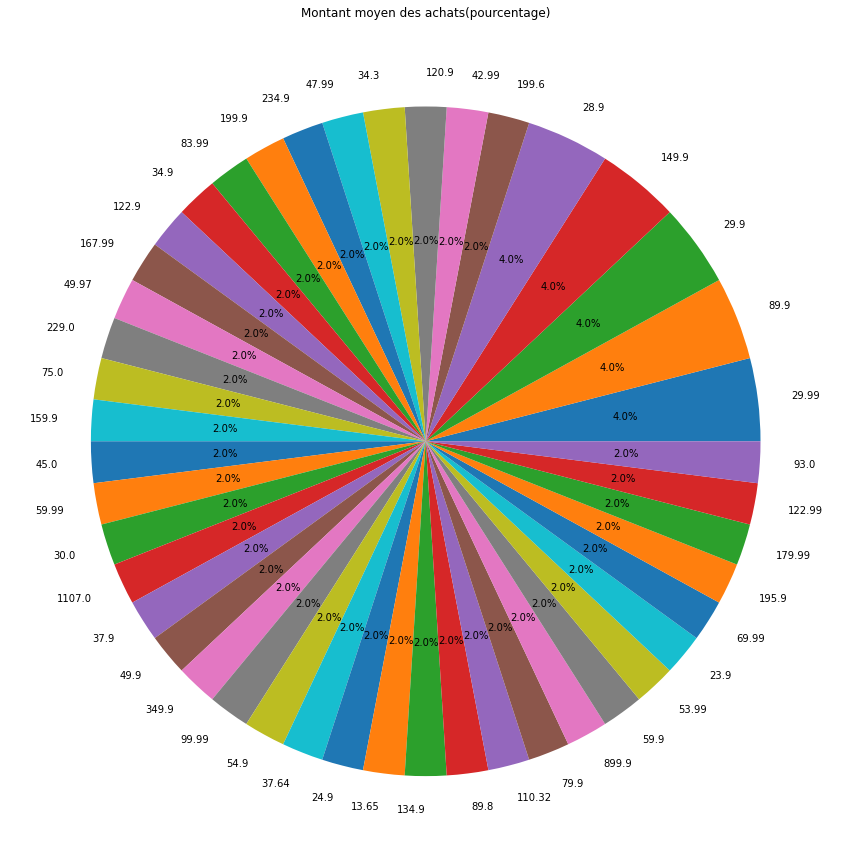

In [29]:
achat = achats_moy.head(50)
achat_order = achat.value_counts()

plt.figure(figsize=[15,40])
plt.subplot(2, 1, 1) # subplot(nrows, ncol, index)
achat_order.plot.pie(autopct='%1.1f%%')
plt.ylabel('')

plt.title('Montant moyen des achats(pourcentage)')

### Nombre moyen de produits par commande

In [30]:
nb_moyen_prod = pd.merge(order_items, orders).groupby(['customer_id', 'order_id'])['price'].count().groupby(['customer_id']).mean()
nb_moyen_prod.rename('Nb_moyen_produits_par_commandes', inplace=True)

customer_id
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
                                   ..
fffcb937e9dd47a13f05ecb8290f4d3e    1
fffecc9f79fd8c764f843e9951b11341    1
fffeda5b6d849fbd39689bb92087f431    1
ffff42319e9b2d713724ae527742af25    1
ffffa3172527f765de70084a7e53aae8    2
Name: Nb_moyen_produits_par_commandes, Length: 98666, dtype: int64

Text(0.5, 1.0, 'Nombre moyen de produits par commande(pourcentage)')

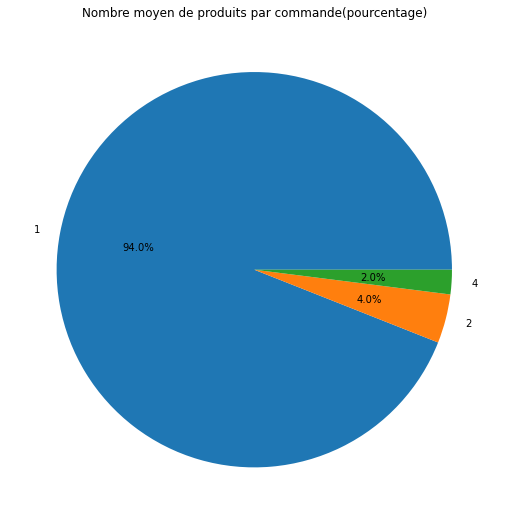

In [31]:
nb_produits= nb_moyen_prod.head(50)
nb_produits_order = nb_produits.value_counts()

plt.figure(figsize=[15,20])
plt.subplot(2, 1, 1) # subplot(nrows, ncol, index)
nb_produits_order.plot.pie(autopct='%1.1f%%')
plt.ylabel('')

plt.title('Nombre moyen de produits par commande(pourcentage)')

### Délai moyen de livraison

In [32]:
order_items['shipping_limit_date'] = order_items['shipping_limit_date'].astype('datetime64')
orders['order_purchase_timestamp'] = orders['order_purchase_timestamp'].astype('datetime64')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce',format='%Y-%m-%d %H:%M:%S')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce',format='%Y-%m-%d %H:%M:%S')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce',format='%Y-%m-%d %H:%M:%S')
orders['order_estimated_delivery_date'] = orders['order_estimated_delivery_date'].astype('datetime64')

In [33]:
delai_livraison = pd.merge(orders, order_items)
delai_livraison.set_index('customer_id', inplace=True)
delai_livraison = delai_livraison['order_delivered_customer_date'] - delai_livraison['order_purchase_timestamp']
delai_livraison.rename('Delai_Moyen_Commande', inplace=True)
delai_livraison = delai_livraison.dt.days +1
delai_livraison

customer_id
9ef432eb6251297304e76186b10a928d     9
b0830fb4747a6c6d20dea0b8c802d7ef    14
41ce2a54c0b03bf3443c3d931a367089    10
f88197465ea7920adcdbec7375364d82    14
8ab97904e6daea8866dbdbc4fb7aad2c     3
                                    ..
1fca14ff2861355f6e5f14306ff977a7    23
1aa71eb042121263aafbe80c1b562c9c    25
b331b74b18dc79bcdf6532d51e1637c1    18
b331b74b18dc79bcdf6532d51e1637c1    18
edb027a75a1449115f6b43211ae02a24     8
Name: Delai_Moyen_Commande, Length: 112650, dtype: int64

Text(0.5, 1.0, 'Délai moyen de livraison en jour(pourcentage)')

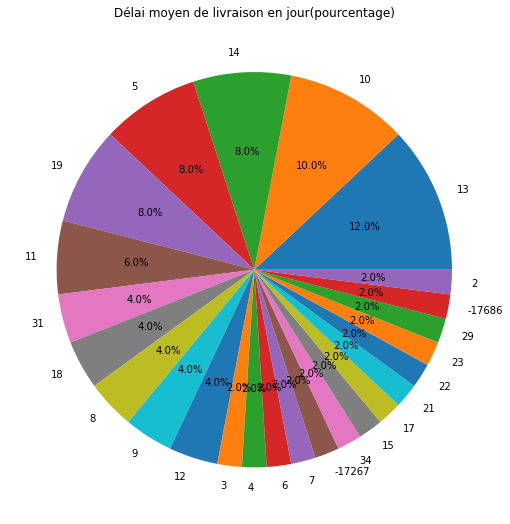

In [34]:
delai_livraison= delai_livraison.head(50)
delai_livraison_order = delai_livraison.value_counts()

plt.figure(figsize=[15,20])
plt.subplot(2, 1, 1) # subplot(nrows, ncol, index)
delai_livraison_order.plot.pie(autopct='%1.1f%%')
plt.ylabel('')

plt.title('Délai moyen de livraison en jour(pourcentage)')

### Moyen de paiement le plus utilisé

In [35]:
#moyen de paiement le plus utilisé
paiement = pd.merge(orders, order_payments).sort_values(
        ['customer_id','payment_type','payment_installments'],ascending=False).groupby(
        ['customer_id', 'payment_type','payment_installments']).head(1)[[
        'customer_id', 'payment_type','payment_installments']]
paiement.columns = ['customer_id', 'Moy_Paiment','Facilités']
paiement.set_index('customer_id', inplace=True)

Text(0.5, 1.0, 'Distribution des types de paiements (pourcentage)')

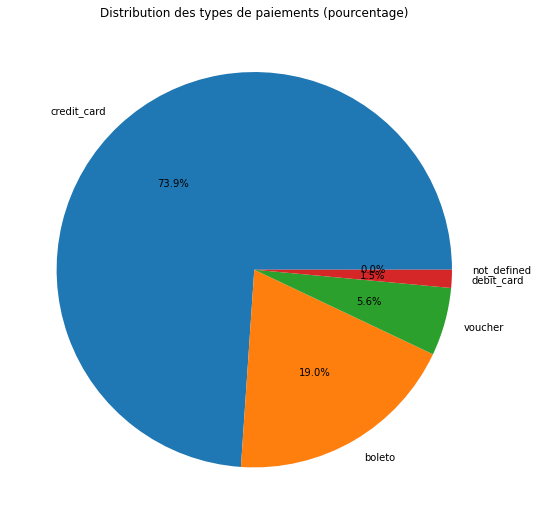

In [36]:
type_paiement = order_payments["payment_type"]
paiement_order = type_paiement.value_counts()

plt.figure(figsize=[15,20])
plt.subplot(2, 1, 1) # subplot(nrows, ncol, index)
paiement_order.plot.pie(autopct='%1.1f%%')
plt.ylabel('')

plt.title('Distribution des types de paiements (pourcentage)')

### Note moyenne des commentaires
    

In [37]:
note_moyenne = pd.merge(order_reviews, orders).groupby('customer_id')['review_score'].mean() 
note_moyenne.rename('Note_Moyenne_Commentaire', inplace=True)

customer_id
00012a2ce6f8dcda20d059ce98491703    1.0
000161a058600d5901f007fab4c27140    4.0
0001fd6190edaaf884bcaf3d49edf079    5.0
0002414f95344307404f0ace7a26f1d5    5.0
000379cdec625522490c315e70c7a9fb    4.0
                                   ... 
fffecc9f79fd8c764f843e9951b11341    3.0
fffeda5b6d849fbd39689bb92087f431    4.0
ffff42319e9b2d713724ae527742af25    5.0
ffffa3172527f765de70084a7e53aae8    5.0
ffffe8b65bbe3087b653a978c870db99    5.0
Name: Note_Moyenne_Commentaire, Length: 99441, dtype: float64

Text(0.5, 1.0, 'Distribution des commentaire (pourcentage)')

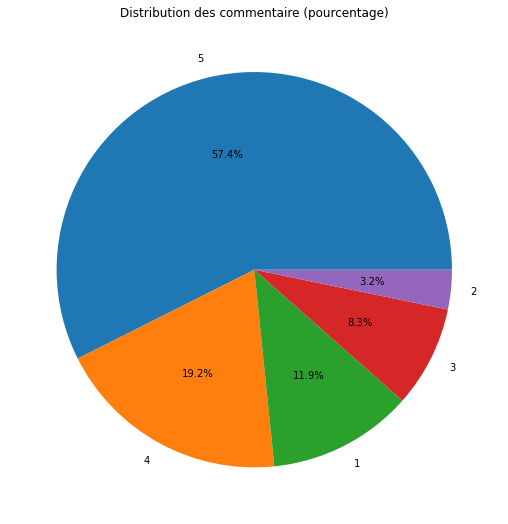

In [38]:
not_comm = order_reviews["review_score"]
order = not_comm.value_counts()

plt.figure(figsize=[15,20])
plt.subplot(2, 1, 1) # subplot(nrows, ncol, index)
order.plot.pie(autopct='%1.1f%%')
plt.ylabel('')

plt.title('Distribution des commentaires (pourcentage)')

In [39]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


### Heure du dernier achat

In [40]:
date_achat = pd.merge(order_items, orders)[[
        'customer_id', 'order_purchase_timestamp']].groupby(['customer_id']).max()
date_achat['heure_achat'] = date_achat['order_purchase_timestamp'].apply(lambda x: x.hour)

### Jour de la semaine du dernier achat 

In [41]:
date_achat['jour_achat'] = date_achat['order_purchase_timestamp'].apply(lambda x: x.weekday())

In [42]:
date_achat

,order_purchase_timestamp,heure_achat,jour_achat
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,16,1
000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,9,6
0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,11,1
0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,13,2
000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,13,0
...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,0,5
fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,16,3
fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,13,1


### Tarif livraison

In [43]:
tarif_fret = pd.merge(order_items, orders)[[
    'customer_id', 'freight_value']].groupby(['customer_id']).max()

In [44]:
tarif_fret

,freight_value
customer_id,
00012a2ce6f8dcda20d059ce98491703,24.94
000161a058600d5901f007fab4c27140,12.51
0001fd6190edaaf884bcaf3d49edf079,15.43
0002414f95344307404f0ace7a26f1d5,29.45
000379cdec625522490c315e70c7a9fb,14.01
...,...
fffcb937e9dd47a13f05ecb8290f4d3e,13.91
fffecc9f79fd8c764f843e9951b11341,26.46
fffeda5b6d849fbd39689bb92087f431,15.23


### Données de géolocalisation

In [45]:
geol = pd.merge(customers,geolocation, 
                               how='left', 
                               left_on='customer_zip_code_prefix', 
                               right_on='geolocation_zip_code_prefix'
                              ).groupby(
        'customer_unique_id').mean()[['geolocation_lat', 'geolocation_lng']]
                                    

In [46]:
geol

,geolocation_lat,geolocation_lng
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,-23.340262,-46.831085
0000b849f77a49e4a4ce2b2a4ca5be3f,-23.559044,-46.788516
0000f46a3911fa3c0805444483337064,-27.543010,-48.634938
0000f6ccb0745a6a4b88665a16c9f078,-1.312726,-48.482748
0004aac84e0df4da2b147fca70cf8255,-23.505588,-47.469820
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,-8.362654,-36.562103
fffea47cd6d3cc0a88bd621562a9d061,-12.217900,-38.959237
ffff371b4d645b6ecea244b27531430a,-11.834705,-55.508145


### Données sur les villes et région

In [47]:
customers_localisation = pd.merge(customers,geolocation, 
                               how='right', 
                               left_on='customer_zip_code_prefix', 
                               right_on='geolocation_zip_code_prefix'
                              ).groupby(
        'customer_unique_id').max()[['customer_city', 'customer_state']]

In [48]:
customers_localisation

,customer_city,customer_state
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP
0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,SP
0000f46a3911fa3c0805444483337064,sao jose,SC
0000f6ccb0745a6a4b88665a16c9f078,belem,PA
0004aac84e0df4da2b147fca70cf8255,sorocaba,SP
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,sanharo,PE
fffea47cd6d3cc0a88bd621562a9d061,feira de santana,BA
ffff371b4d645b6ecea244b27531430a,sinop,MT


## Création du nouveau dataframe

In [49]:
nb_produits_total.reset_index(drop=True, inplace=True)
cat.reset_index(drop=True, inplace=True)
achats_moy.reset_index(drop=True, inplace=True)
nb_moyen_prod.reset_index(drop=True, inplace=True)
delai_livraison.reset_index(drop=True, inplace=True)
paiement.reset_index(drop=True, inplace=True)
note_moyenne.reset_index(drop=True, inplace=True)
date_achat.reset_index(drop=True, inplace=True)
geol.reset_index(drop=True, inplace=True)
customers_localisation.reset_index(drop=True, inplace=True)
tarif_fret.reset_index(drop=True, inplace=True)

In [50]:
data_new = pd.concat([nb_produits_total,cat,achats_moy,nb_moyen_prod,delai_livraison,paiement,note_moyenne,date_achat, tarif_fret,geol, customers_localisation], axis=1)

In [51]:
data_new['customer_unique_id'] = customers['customer_unique_id']

In [52]:
final_data = pd.DataFrame(data=data_new)
final_data=final_data.set_index('customer_unique_id')
final_data

,Nb_pdts,categorie_la_plus_achetee,Total_moyen_achats,Nb_moyen_produits_par_commandes,Delai_Moyen_Commande,Moy_Paiment,Facilités,Note_Moyenne_Commentaire,order_purchase_timestamp,heure_achat,jour_achat,freight_value,geolocation_lat,geolocation_lng,customer_city,customer_state
customer_unique_id,,,,,,,,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,1.0,home,89.80,1.0,9.0,boleto,1,1.0,2017-11-14 16:08:26,16.0,1.0,24.94,-23.340262,-46.831085,cajamar,SP
290c77bc529b7ac935b93aa66c333dc3,1.0,home,54.90,1.0,14.0,credit_card,4,4.0,2017-07-16 09:40:32,9.0,6.0,12.51,-23.559044,-46.788516,osasco,SP
060e732b5b29e8181a18229c7b0b2b5e,1.0,electronics,179.99,1.0,10.0,credit_card,2,5.0,2017-02-28 11:06:43,11.0,1.0,15.43,-27.543010,-48.634938,sao jose,SC
259dac757896d24d7702b9acbbff3f3c,1.0,home,149.90,1.0,14.0,credit_card,3,5.0,2017-08-16 13:09:20,13.0,2.0,29.45,-1.312726,-48.482748,belem,PA
345ecd01c38d18a9036ed96c73b8d066,1.0,arts,93.00,1.0,3.0,voucher,1,4.0,2018-04-02 13:42:17,13.0,0.0,14.01,-23.505588,-47.469820,sorocaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,boleto,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,boleto,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,credit_card,10,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Supression des NaN

In [53]:
final_data['categorie_la_plus_achetee'].fillna('Unknown', inplace=True)

In [54]:
final_data['Total_moyen_achats'].dropna(how='all', axis=0, inplace=True)

In [55]:
final_data['Nb_moyen_produits_par_commandes'].dropna(how='all', axis=0, inplace=True)

In [56]:
final_data['Delai_Moyen_Commande'].fillna(-1,axis=0,inplace=True)

In [57]:
final_data.dropna(axis=0, inplace=True)

In [58]:
final_data

,Nb_pdts,categorie_la_plus_achetee,Total_moyen_achats,Nb_moyen_produits_par_commandes,Delai_Moyen_Commande,Moy_Paiment,Facilités,Note_Moyenne_Commentaire,order_purchase_timestamp,heure_achat,jour_achat,freight_value,geolocation_lat,geolocation_lng,customer_city,customer_state
customer_unique_id,,,,,,,,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,1.0,home,89.80,1.0,9.0,boleto,1,1.0,2017-11-14 16:08:26,16.0,1.0,24.94,-23.340262,-46.831085,cajamar,SP
290c77bc529b7ac935b93aa66c333dc3,1.0,home,54.90,1.0,14.0,credit_card,4,4.0,2017-07-16 09:40:32,9.0,6.0,12.51,-23.559044,-46.788516,osasco,SP
060e732b5b29e8181a18229c7b0b2b5e,1.0,electronics,179.99,1.0,10.0,credit_card,2,5.0,2017-02-28 11:06:43,11.0,1.0,15.43,-27.543010,-48.634938,sao jose,SC
259dac757896d24d7702b9acbbff3f3c,1.0,home,149.90,1.0,14.0,credit_card,3,5.0,2017-08-16 13:09:20,13.0,2.0,29.45,-1.312726,-48.482748,belem,PA
345ecd01c38d18a9036ed96c73b8d066,1.0,arts,93.00,1.0,3.0,voucher,1,4.0,2018-04-02 13:42:17,13.0,0.0,14.01,-23.505588,-47.469820,sorocaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503f8e014d74b09cfe772d0279c361b9,1.0,arts,59.90,1.0,-1.0,credit_card,2,5.0,2017-06-24 19:38:52,19.0,5.0,14.13,-22.870003,-47.210739,sanharo,PE
70b74561278df139c3b0554de10e3636,1.0,sports_leisure,6.00,1.0,-1.0,credit_card,8,2.0,2017-12-25 19:20:31,19.0,0.0,7.78,-21.751133,-43.365606,feira de santana,BA
fd9c9d8749551eb44b8cf0ae092c92e1,1.0,health_beauty,199.90,1.0,-1.0,credit_card,2,5.0,2018-01-17 13:28:49,13.0,2.0,15.15,-23.136161,-46.468852,sinop,MT


In [59]:
#final_data.reset_index(drop=True, inplace=True)

# Outlier 

### Nettoyage des outliers

In [ ]:
print('taille du jeu de données pré-nettoyage outliers : ', final_data.shape)
final_data = clean_outliers(final_data)
print('taille du jeu de données post-nettoyage outliers : ', final_data.shape)

In [60]:
final_data

,Nb_pdts,categorie_la_plus_achetee,Total_moyen_achats,Nb_moyen_produits_par_commandes,Delai_Moyen_Commande,Moy_Paiment,Facilités,Note_Moyenne_Commentaire,order_purchase_timestamp,heure_achat,jour_achat,freight_value,geolocation_lat,geolocation_lng,customer_city,customer_state
customer_unique_id,,,,,,,,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,1.0,home,89.80,1.0,9.0,boleto,1,1.0,2017-11-14 16:08:26,16.0,1.0,24.94,-23.340262,-46.831085,cajamar,SP
290c77bc529b7ac935b93aa66c333dc3,1.0,home,54.90,1.0,14.0,credit_card,4,4.0,2017-07-16 09:40:32,9.0,6.0,12.51,-23.559044,-46.788516,osasco,SP
060e732b5b29e8181a18229c7b0b2b5e,1.0,electronics,179.99,1.0,10.0,credit_card,2,5.0,2017-02-28 11:06:43,11.0,1.0,15.43,-27.543010,-48.634938,sao jose,SC
259dac757896d24d7702b9acbbff3f3c,1.0,home,149.90,1.0,14.0,credit_card,3,5.0,2017-08-16 13:09:20,13.0,2.0,29.45,-1.312726,-48.482748,belem,PA
345ecd01c38d18a9036ed96c73b8d066,1.0,arts,93.00,1.0,3.0,voucher,1,4.0,2018-04-02 13:42:17,13.0,0.0,14.01,-23.505588,-47.469820,sorocaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503f8e014d74b09cfe772d0279c361b9,1.0,arts,59.90,1.0,-1.0,credit_card,2,5.0,2017-06-24 19:38:52,19.0,5.0,14.13,-22.870003,-47.210739,sanharo,PE
70b74561278df139c3b0554de10e3636,1.0,sports_leisure,6.00,1.0,-1.0,credit_card,8,2.0,2017-12-25 19:20:31,19.0,0.0,7.78,-21.751133,-43.365606,feira de santana,BA
fd9c9d8749551eb44b8cf0ae092c92e1,1.0,health_beauty,199.90,1.0,-1.0,credit_card,2,5.0,2018-01-17 13:28:49,13.0,2.0,15.15,-23.136161,-46.468852,sinop,MT


In [61]:
#final_data[final_data.index.duplicated()]

In [62]:
#final_data = final_data[~final_data.index.duplicated()]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8508762950>,
      dtype=object)

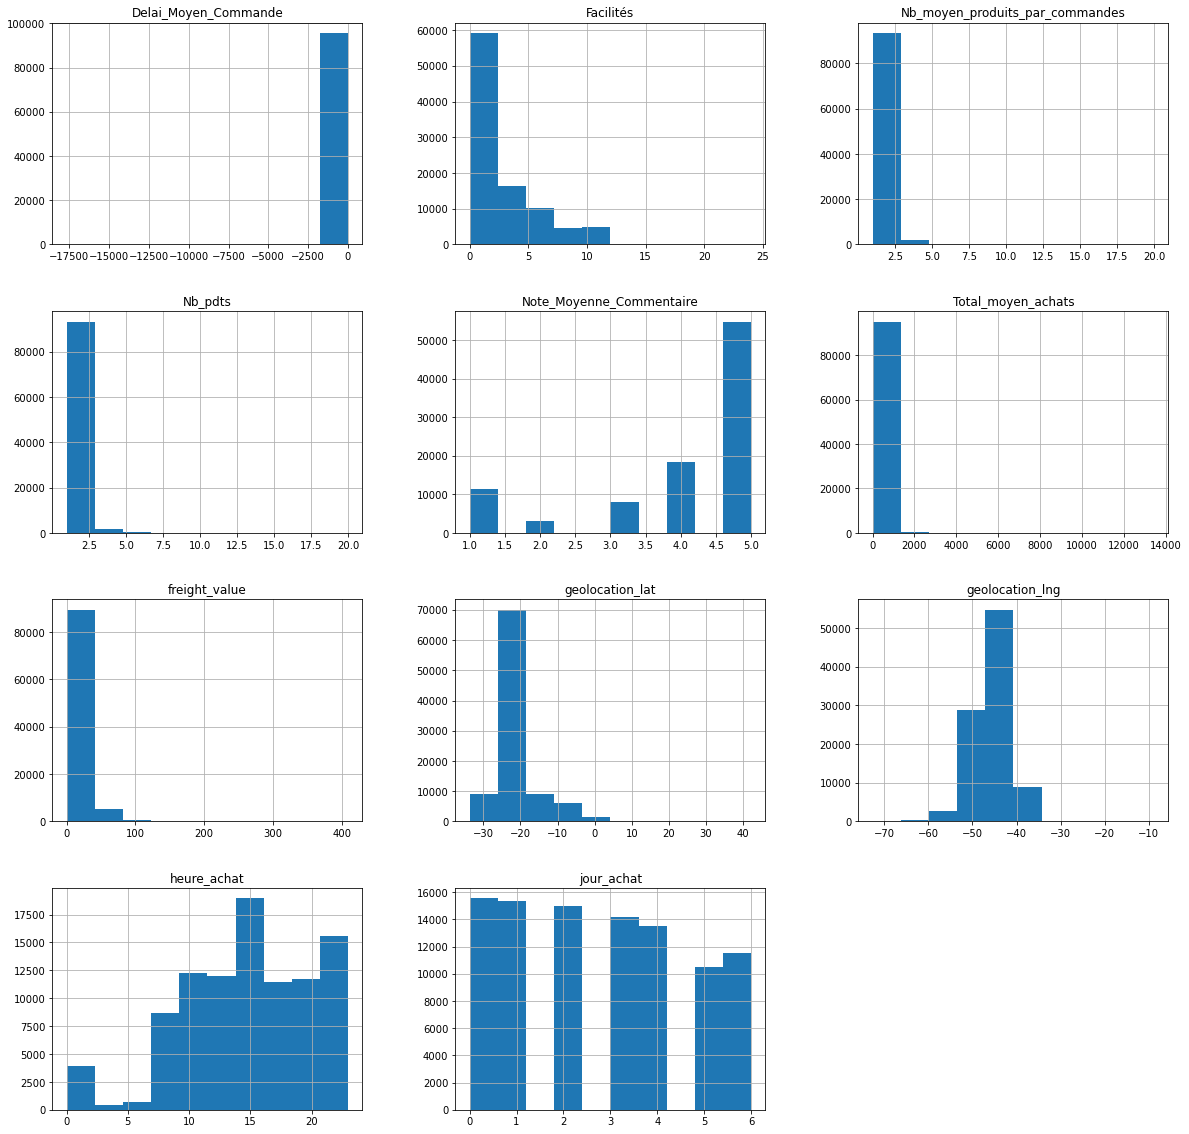

In [63]:
final_data.hist(figsize=[20,20])

# Exploration 

## Informations jeu de données initial

**Historique**

In [64]:
orders['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [65]:
orders['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

On a 2 années d'historique : de septembre 2016 à octobre 2018

**Nombre de clients**

In [66]:
customers['customer_unique_id'].nunique()

96096

**Nombre de transactions**

In [67]:
orders['order_id'].nunique()

99441

On a presque autant de clients que de transactions => peu de clients ont fait plus d'une transaction.

**Nombre de vendeurs**

In [68]:
order_items['seller_id'].nunique()

3095

**Nombre de produits**

In [69]:
order_items['product_id'].nunique()

32951

**Nombre de produits par vendeur**

In [70]:
produits_par_vendeur = pd.merge(order_items, order_items).groupby(
    ['seller_id','product_id']).count().reset_index().groupby(
    'seller_id').count()['product_id'].sum()
produits_par_vendeur

34448

In [71]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


**Région avec le plus de clients**

In [72]:
region = final_data.groupby(['customer_state']).count().sort_values(
    by='customer_city', ascending=False)['customer_city'].head(10)
region

customer_state
SP    40176
RJ    12331
MG    11202
RS     5253
PR     4859
SC     3524
BA     3260
ES     1951
GO     1936
DF     1899
Name: customer_city, dtype: int64

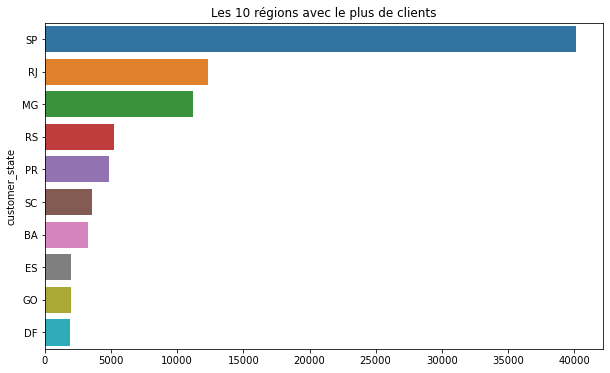

In [73]:
region = final_data.groupby(['customer_state']).count().sort_values(
    by='customer_city', ascending=False)['customer_city'].head(10)
plt.figure(figsize=(10,6))
plt.title('Les 10 régions avec le plus de clients')
sns.barplot(x = region.values,
           y = region.index)

**Villes avec le plus de clients**

In [74]:
villes = final_data.groupby(['customer_city']).count()[
    'customer_state'].sort_values(ascending=False).head(10)
villes

customer_city
sao paulo                14931
rio de janeiro            6599
belo horizonte            2656
brasilia                  1892
curitiba                  1459
campinas                  1393
porto alegre              1321
salvador                  1202
guarulhos                 1151
sao bernardo do campo      906
Name: customer_state, dtype: int64

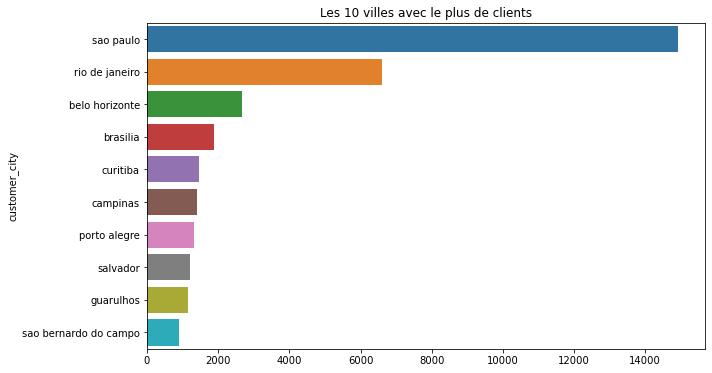

In [75]:
villes = final_data.groupby(['customer_city']).count()[
    'customer_state'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.title('Les 10 villes avec le plus de clients')
sns.barplot(x = villes.values,
           y = villes.index)

**Catégories les plus achetées**

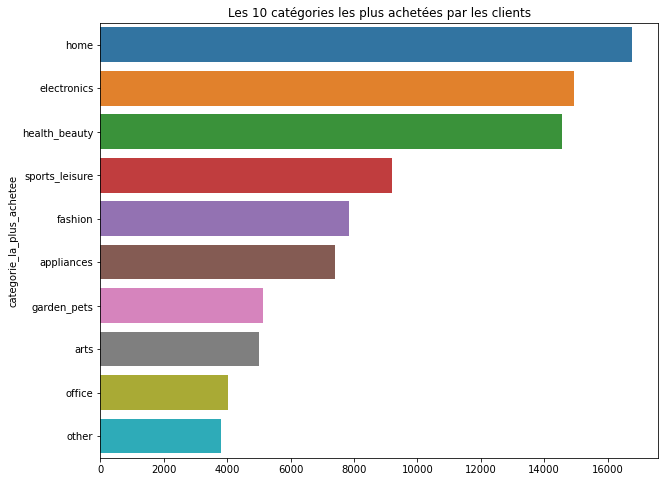

In [76]:
categories = final_data.groupby(['categorie_la_plus_achetee']).count()[
    'customer_city'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,8))
plt.title('Les 10 catégories les plus achetées par les clients')
sns.barplot(x = categories.values,
           y = categories.index)

**Moyen de paiement les plus utilisées**

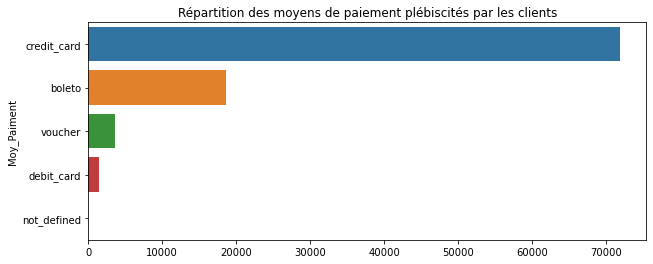

In [77]:
paiement = final_data.groupby(['Moy_Paiment']).count()[
    'customer_city'].sort_values(ascending=False)
plt.figure(figsize=(10,4))
plt.title('Répartition des moyens de paiement plébiscités par les clients')
sns.barplot(x = paiement.values,
           y = paiement.index)

**Conclusions sur l'analyse des distributions des variables:**
* très peu de clients ont fait plus d'un achat;
* la carte bancaire et le moyen de paiement le plus utilisé
* les villes de sao paulo et rio de janeiro ont le plus de clients 

In [78]:
final_data.describe()

,Nb_pdts,Total_moyen_achats,Nb_moyen_produits_par_commandes,Delai_Moyen_Commande,Facilités,Note_Moyenne_Commentaire,heure_achat,jour_achat,freight_value,geolocation_lat,geolocation_lng
count,95560.000000,95560.000000,95560.000000,95560.000000,95560.000000,95560.000000,95560.000000,95560.000000,95560.000000,95560.000000,95560.000000
mean,1.141628,137.837242,1.141628,-1.358424,2.886134,4.071114,14.776057,2.756300,20.344776,-21.180841,-46.173642
std,0.535741,211.272394,0.535741,79.954000,2.699099,1.357884,5.325443,1.966836,15.945408,5.620741,4.060344
min,1.000000,0.850000,1.000000,-17686.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-33.689890,-72.668821
25%,1.000000,45.900000,1.000000,-1.000000,1.000000,4.000000,11.000000,1.000000,13.390000,-23.589436,-48.107742
50%,1.000000,86.900000,1.000000,-1.000000,2.000000,5.000000,15.000000,3.000000,16.460000,-22.924079,-46.630563
75%,1.000000,149.900000,1.000000,-1.000000,4.000000,5.000000,19.000000,4.000000,21.390000,-20.133169,-43.593246
max,20.000000,13440.000000,20.000000,34.000000,24.000000,5.000000,23.000000,6.000000,409.680000,42.184003,-8.723762


In [79]:
final_data

,Nb_pdts,categorie_la_plus_achetee,Total_moyen_achats,Nb_moyen_produits_par_commandes,Delai_Moyen_Commande,Moy_Paiment,Facilités,Note_Moyenne_Commentaire,order_purchase_timestamp,heure_achat,jour_achat,freight_value,geolocation_lat,geolocation_lng,customer_city,customer_state
customer_unique_id,,,,,,,,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,1.0,home,89.80,1.0,9.0,boleto,1,1.0,2017-11-14 16:08:26,16.0,1.0,24.94,-23.340262,-46.831085,cajamar,SP
290c77bc529b7ac935b93aa66c333dc3,1.0,home,54.90,1.0,14.0,credit_card,4,4.0,2017-07-16 09:40:32,9.0,6.0,12.51,-23.559044,-46.788516,osasco,SP
060e732b5b29e8181a18229c7b0b2b5e,1.0,electronics,179.99,1.0,10.0,credit_card,2,5.0,2017-02-28 11:06:43,11.0,1.0,15.43,-27.543010,-48.634938,sao jose,SC
259dac757896d24d7702b9acbbff3f3c,1.0,home,149.90,1.0,14.0,credit_card,3,5.0,2017-08-16 13:09:20,13.0,2.0,29.45,-1.312726,-48.482748,belem,PA
345ecd01c38d18a9036ed96c73b8d066,1.0,arts,93.00,1.0,3.0,voucher,1,4.0,2018-04-02 13:42:17,13.0,0.0,14.01,-23.505588,-47.469820,sorocaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503f8e014d74b09cfe772d0279c361b9,1.0,arts,59.90,1.0,-1.0,credit_card,2,5.0,2017-06-24 19:38:52,19.0,5.0,14.13,-22.870003,-47.210739,sanharo,PE
70b74561278df139c3b0554de10e3636,1.0,sports_leisure,6.00,1.0,-1.0,credit_card,8,2.0,2017-12-25 19:20:31,19.0,0.0,7.78,-21.751133,-43.365606,feira de santana,BA
fd9c9d8749551eb44b8cf0ae092c92e1,1.0,health_beauty,199.90,1.0,-1.0,credit_card,2,5.0,2018-01-17 13:28:49,13.0,2.0,15.15,-23.136161,-46.468852,sinop,MT


import folium

#m = folium.Map(location=[-15.7797200, -47.9297200], zoom_start=6)
#folium.Marker([geol['geolocation_lat'], geol['geolocation_lng']]).add_to(m)
#m

for i in range(0,len(geol)):    
    folium.Marker([geol.iloc[i]['geolocation_lat'], geol.iloc[i]['geolocation_lng']]).add_to(m)

/System/Volumes/Data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


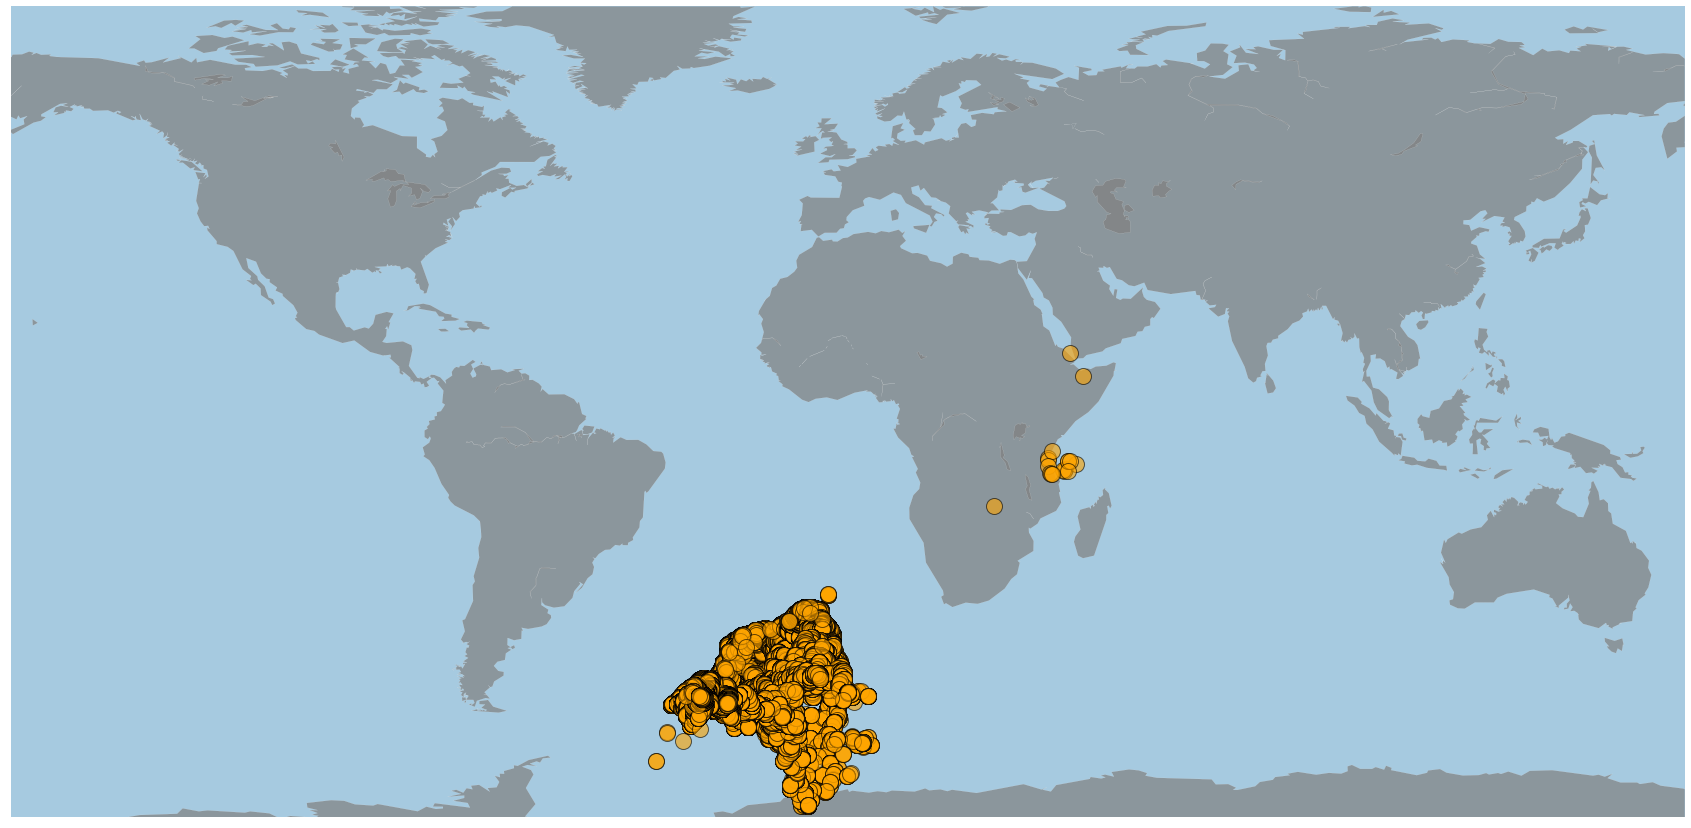

In [83]:
from mpl_toolkits.basemap import Basemap

# A basic map

m=Basemap(llcrnrlon=-160, llcrnrlat=-75,urcrnrlon=160,urcrnrlat=80)
plt.figure(figsize=(30,15))
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
m.plot(geolocation['geolocation_lat'], geolocation['geolocation_lng'], linestyle='none', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)

# Export jeu de données 

In [81]:
final_data.select_dtypes(['object']).nunique()

categorie_la_plus_achetee      13
Moy_Paiment                     5
customer_city                4068
customer_state                 27
dtype: int64

In [82]:
final_data.to_csv('data/data_cleaned.csv')